In [1]:
import numpy as np
import matplotlib.pyplot as plt
from basic_functions import mag_vector, G_N
from particles import Particles
from axionstar import AxionStar
from ns import NeutronStar

In [11]:
# Trajectory of axion star as point particle, starting from positon r0 with velocity v0
def evolve_AS(AS, NS, r0, v0):
    # Instantiate axion star position as a point particles
    AS_particle = Particles([r0], [v0])
    # Remove star if it will not reach the Roche radius
    roche = AS.roche(NS)
    AS_particle.remove_particles_far(roche, NS)
    if AS_particle.nparticles == 0:
        return None
    # Evolve until it reaches the Roche radius
    return AS_particle.trajectories(NS, roche/100000000, -1)

def evolve_particles(AS, NS, nparticles):
    # Replace axion star by collection of free particles
    positions, velocities = AS.draw_particles(nparticles)
    particles = Particles(positions, velocities)
    # Remove particles that will not get close to conversion radius
    particles.remove_particles_far(NS.conversion_radius(), NS)
    # Find trajectories
    rmax = np.max(mag_vector(positions))
    return particles.trajectories(NS, rmax)


In [12]:
r_in, v_in = [1e14, 6e3, 0.], [-300., 0, 0]
M_NS, R_NS, M_AS = 1.4, 10, 1

NS = NeutronStar(M_NS, R_NS)
AS = AxionStar(M_AS, Particles.axionmass)

In [13]:
AS_traj = evolve_AS(AS, NS, r_in, v_in)
# AS.center, AS.vcenter = AS_traj[0][0][0][-1], AS_traj[0][0][1][-1]

[[1.61725067e+15 3.33333333e+07]] [33333333.33333333]
[[1.61692724e+15 3.33300000e+07]] [33329999.99993129]
[[1.61660387e+15 3.33266670e+07]] [33326666.99986259]
[[1.61628057e+15 3.33233343e+07]] [33323334.3330939]
[[1.61595733e+15 3.33200020e+07]] [33320001.99959187]
[[1.61563415e+15 3.33166700e+07]] [33316669.99932321]
[[1.61531104e+15 3.33133383e+07]] [33313338.33225457]
[[1.61498799e+15 3.33100070e+07]] [33310006.99835264]
[[1.61466501e+15 3.33066760e+07]] [33306675.9975841]
[[1.61434210e+15 3.33033453e+07]] [33303345.32991563]
[[1.61401924e+15 3.33000150e+07]] [33300014.99531393]
[[1.61369646e+15 3.32966850e+07]] [33296684.9937457]
[[1.61337373e+15 3.32933553e+07]] [33293355.32517761]
[[1.61305107e+15 3.32900260e+07]] [33290025.98957639]
[[1.61272848e+15 3.32866970e+07]] [33286696.98690872]
[[1.61240595e+15 3.32833683e+07]] [33283368.31714132]
[[1.61208349e+15 3.32800400e+07]] [33280039.9802409]
[[1.61176108e+15 3.32767120e+07]] [33276711.97617416]
[[1.61143875e+15 3.32733843e+07]

KeyboardInterrupt: 

In [ ]:
part_trajs = evolve_particles(AS, NS, int(1e2))

In [60]:
import multiprocess as mp
nprocs = mp.cpu_count()
pool = mp.Pool(processes=nprocs)

part_trajs2 = pool.starmap(evolve_particles, [(AS, NS, int(10)) for i in np.arange(10)])

In [25]:
part_trajs[0].shape

(100, 2, 292393, 3)

In [30]:
part_trajs[0][0][0].T

array([[ 5.50485967e+06,  5.50430918e+06,  5.50375874e+06, ...,
         5.34873660e+06,  5.34927158e+06,  5.34980661e+06],
       [ 5.16686741e+03,  5.16680441e+03,  5.16674141e+03, ...,
        -1.34715441e+06, -1.34728869e+06, -1.34742297e+06],
       [ 3.86988210e-02,  3.86988210e-02,  3.86988208e-02, ...,
        -1.14960127e+01, -1.14971586e+01, -1.14983045e+01]])

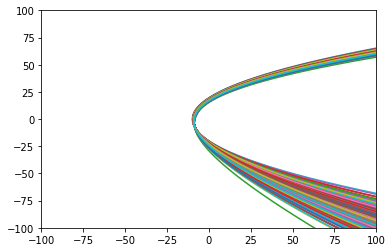

In [46]:
for pp in part_trajs[0]:
    plt.plot(pp[0].T[0], pp[0].T[1])
plt.xlim(left = -1e2, right = 1e2);
plt.ylim(bottom = -1e2, top = 1e2);

In [4]:
trajs = evolve_AS(AS, NS, [[1e14, 1*1e6, 0.]], [[-300., 0, 0]])

(-1000.0, 100000000.0)

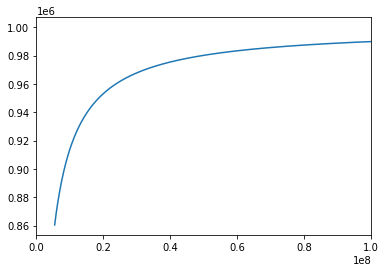

In [5]:
plt.plot(trajs[0][0][0].T[0], trajs[0][0][0].T[1])
plt.xlim(left = -1e3, right = 1e8)

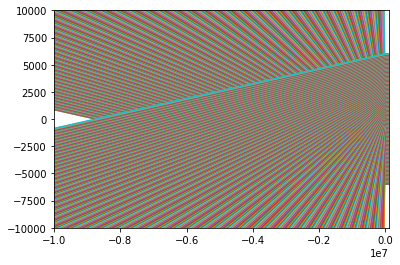

In [95]:
for i in np.arange(1000):
    plt.plot(trajs[0][i][0].T[0], trajs[0][i][0].T[1])
plt.xlim(left = -1e7, right = 1e5)
plt.ylim(bottom = -1e4, top = 1e4)
plt.show()

c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\ns.py:14: RuntimeWarning: invalid value encountered in true_divide
  return -G_N*self.mass/np.power(self.radius,3)*numbers_times_vectors(np.heaviside(in_or_out, 0.), positions) -G_N*self.mass*numbers_times_vectors(np.heaviside(np.logical_not(in_or_out), 0.)/np.power(distances,3), positions)


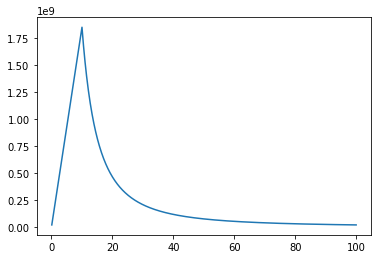

In [26]:
rrange = np.linspace(0, 1e2, 1000)
positions = np.array([[r, 0, 0] for r in rrange])
plt.plot(rrange, mag_vector(NS.gravitational_field(positions)))

In [6]:
AS.center = AS.roche(NS)*np.array([1,0,0])
AS.velocity = [-1e2, 0, 0]

(-55.04399009660151, 55.04399009660151)

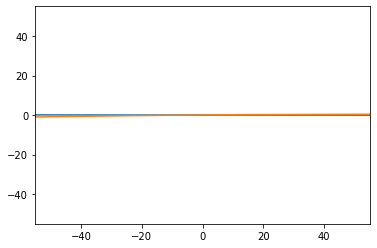

In [7]:
AS.draw_particle_positions(10)
positions_res = np.array(AS.trajectories(NS))[0]

pos_part, pos_part2 = [], []
for i in np.arange(len(positions_res)):
    pos_part.append(positions_res[i][0])
    pos_part2.append(positions_res[i][1])

plt.plot(np.array(pos_part).T[0], np.array(pos_part).T[1])
plt.plot(np.array(pos_part2).T[0], np.array(pos_part2).T[1])
plt.xlim(left = - AS.roche(NS)/100000, right = AS.roche(NS)/100000)
plt.ylim(bottom = - AS.roche(NS)/100000, top = AS.roche(NS)/100000)

In [4]:
positions = AS.draw_particle_positions(10)
NS.gravitational_field(positions)
# AS.trajectories(NS)

TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'int'

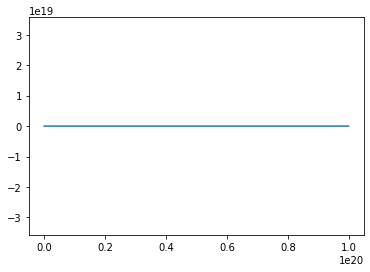

In [5]:
traj = p_in.trajectory(NS, AS)[0]
plt.plot(np.array(traj).T[0], np.array(traj).T[1])
plt.axis('equal');

In [19]:
# positions_draw = AS.draw_particle_positions(int(1e5))

In [10]:
p.min_approach(NS)

0.0873316108045401

In [35]:
collision(p, NS, AS)

In [13]:
AS.radius99()

390.53254437869816

In [14]:
positions_draw.T[1]

array([ 99990.14904728,  99871.67617654,  99907.41501765, ...,
        99986.96740487, 100082.43072786, 100000.02622021])

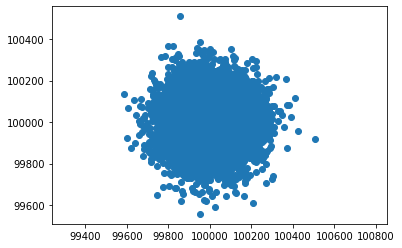

In [15]:
plt.scatter(positions_draw.T[0], positions_draw.T[1])
plt.axis('equal');

In [6]:
AS.roche(NS)

550.4399009660151

c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\particle_clump.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  dt1, dt2 = rprecision*mag_vector(self.velocity)/mag_vector(self.acceleration), rprecision*mag_vector(self.position)/mag_vector(self.velocity)


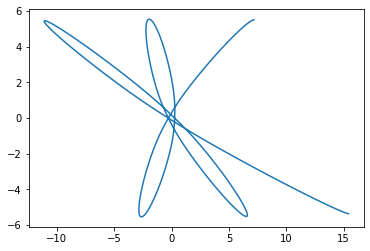

In [8]:
p2 = Particle(positions_draw[1], [-1e3, 0, 0.])
traj = p2.trajectory(NS, 5)[0]
plt.plot(np.array(traj).T[0], np.array(traj).T[1])

In [11]:
for i in np.arange(len(positions_draw)):
    p2 = Particle(positions_draw[i], [-300, 0, 0.])
    traj = p2.trajectory(NS, 5)[0]
    print(i, p2.min_approach(NS))

0 0.00446010459448587
1 0.010005416740234807
2 0.04004824205607349
3 0.03593672115827928
4 0.1266281255296775
5 0.03757014561463734
6 0.06731591007390136
7 0.059025740176025465
8 0.03474507815421646
9 0.11592833969828575
10 0.02735874254568671
11 0.06802018062602144
12 0.10908703999359659
13 0.03225017508223971
14 0.019055818845153283
15 0.12940278428921204
16 0.1409906429185952


KeyboardInterrupt: 